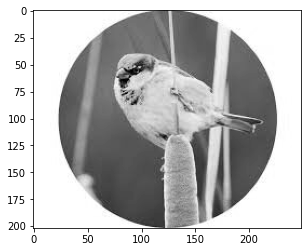

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cv2

datadir = 'C:/Development/AI/ai-dataanalys-BBA-ta-suniL/AI Grunder/Projekt/images'
categories = ['finch', 'owl']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


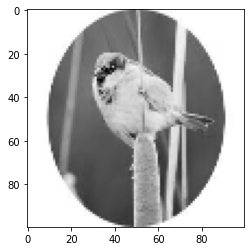

In [3]:
img_size = 100

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:   
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [5]:
print(len(training_data))

795


In [6]:
import random

random.shuffle(training_data)

In [7]:
# for sample in training_data:
#     print(sample[1])

In [8]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [9]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [21]:
# FRÅN ANNAN FIL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Dense(2))
model.add(Activation("sigmoid"))

model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=['accuracy']) 

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)


Epoch 1/10
23/23 [==============================] - 26s 1s/step - loss: 0.3709 - accuracy: 0.4764 - val_loss: 0.2503 - val_accuracy: 0.4625
Epoch 2/10
23/23 [==============================] - 19s 808ms/step - loss: 0.2501 - accuracy: 0.5247 - val_loss: 0.2499 - val_accuracy: 0.5500
Epoch 3/10
23/23 [==============================] - 20s 876ms/step - loss: 0.2500 - accuracy: 0.5201 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 4/10
23/23 [==============================] - 18s 801ms/step - loss: 0.2500 - accuracy: 0.5493 - val_loss: 0.2499 - val_accuracy: 0.5500
Epoch 5/10
23/23 [==============================] - 18s 786ms/step - loss: 0.2500 - accuracy: 0.5005 - val_loss: 0.2498 - val_accuracy: 0.5625
Epoch 6/10
23/23 [==============================] - 14s 589ms/step - loss: 0.2497 - accuracy: 0.7036 - val_loss: 0.2498 - val_accuracy: 0.5750
Epoch 7/10
23/23 [==============================] - 13s 570ms/step - loss: 0.2496 - accuracy: 0.6959 - val_loss: 0.2499 - val_accuracy: 0.6000
Ep

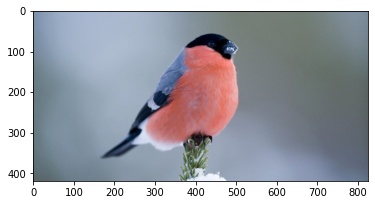

In [36]:
new_image = plt.imread('../test_images/domherre.jpg')
img = plt.imshow(new_image)

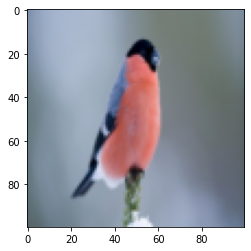

In [37]:
# Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (100,100,3))
img = plt.imshow(resized_image)

In [38]:
# Get the model's predictions
predictions = model.predict(np.array([resized_image]))
# Show the predictions
predictions

array([[0.4823479, 0.5248858]], dtype=float32)

In [39]:
# Sort the predicions from least to greatest
list_index = [0,1]
x = predictions

for i in range(2):
    for j in range(2):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

# Show the sorted labels in order
print(list_index)


[1, 0]


In [40]:
# Print the first 2 predictions

classification = ['finch', 'owl']

for i in range(2):
    print(str(i+1) + '. ' + classification[list_index[i]] + ' (' + str(round(predictions[0][list_index[i]] * 100, 2)) + '%)')

1. owl (52.49%)
2. finch (48.23%)
